# Workshop 02 - Histograms filters and edges
_Author: Nicola Romanò - [nicola.romano@ed.ac.uk](mailto:nicola.romano@ed.ac.uk)_

## Introduction

This workshop will be based on what you have learned in lectures 3, 4, and 5, related to image histograms, filters, and edge detection.

In this practical we are going to apply some of that knowledge to the processing of biomedical images.

## Learning objectives

At the end of this workshop you should be able to:
- Plot and manipulate histograms of images
- Apply filters to images
- Apply edge detection algorithms

## Histogram manipulation

In Lecture 3 you learned about histograms and their use in image processing.

Let's start with a few simple examples. Load the images `xray.png`, `mri.png` and `mouse.png` and plot them, alongside their histograms.

Make sure you look at the shape of the image before plotting the histogram and think about what is the best way to plot the histogram.

<details>
    <summary style="cursor: pointer;">Click here to reveal a hint.</summary>
    When calling the `hist` function remember to flatten the image using <code>.ravel()</code> before plotting!
</details>

Image credits:
- Hand X-Rays: Rahim Packir Saibo, [CC-BY-2.0](https://creativecommons.org/licenses/by/2.0/)
- MRI: Bryan Kiechle, [CC-BY-NC-2.0](https://creativecommons.org/licenses/by-nc/2.0/)
- Mouse: Global Panorama, [CC-BY-SA-20](https://creativecommons.org/licenses/by-sa/2.0/)

(800, 592)
(797, 800, 3)
(533, 800, 3)


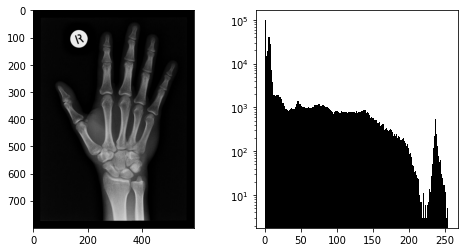

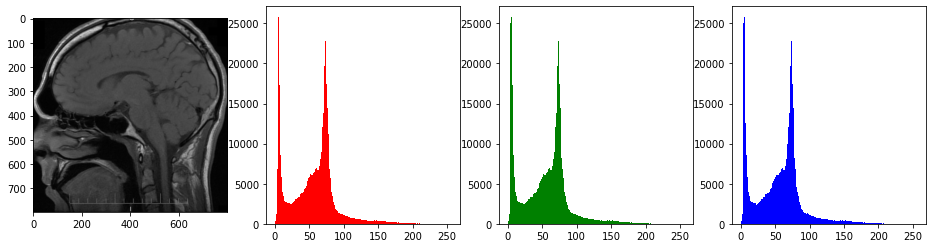

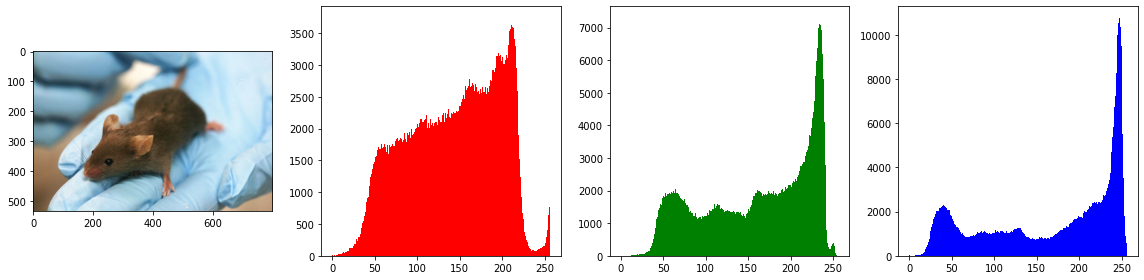

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

xray = imread("xray.png")
mri = imread("mri.png")
mouse = imread("mouse.png")

print(xray.shape)
print(mri.shape)
print(mouse.shape)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# This probably is easier to understand in log scale
ax[0].imshow(xray, cmap="gray")
ax[1].hist(xray.ravel(), bins=256, range=(0, 256), color='black', log=True)
plt.show()

# The MRI and mouse images are RGB, so we can plot 3 different histograms for the 3 channels
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(mri, cmap="gray")
ax[1].hist(mri[:,:,0].ravel(), bins=256, range=(0, 256), color='red')
ax[2].hist(mri[:,:,1].ravel(), bins=256, range=(0, 256), color='green')
ax[3].hist(mri[:,:,2].ravel(), bins=256, range=(0, 256), color='blue')

fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(mouse)
ax[1].hist(mouse[:,:,0].ravel(), bins=256, range=(0, 256), color='red')
ax[2].hist(mouse[:,:,1].ravel(), bins=256, range=(0, 256), color='green')
ax[3].hist(mouse[:,:,2].ravel(), bins=256, range=(0, 256), color='blue')

plt.tight_layout()

### Questions

1. What can you conclude by looking at the histograms regarding their exposure/contrast?
2. Can you explain why there are clear peaks in some of those histograms?
3. Did you notice anything particular when looking at the MRI image and its corresponding histogram?

### Answers

1. The X-Ray image and the mouse image seem to be correctly exposed. The MRI image is underexposed, since the histogram is shifted to the left. The mouse image is slightly overexposed in green and blue, while it is well exposed in red.
2. There are clear peaks around 0 and the top of the image range in the X-Ray and MRI histograms. These correspond to the black background and the bright areas (such as the circle with R written in it on the X-Ray) respsectively.
3. The MRI image is essentially a grayscale image that has been saved as RGB, since the three channels are identical.


When faced with situations like that of the MRI image, where a grayscale image is saved as RGB, there are two options:

1. The simplest thing is to take one of the colour channels.

2. Alternatively you can use the `rgb2gray` in `skimage.color` to convert an RGB image to a grayscale image. If you read the function's [manual page](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray), you will see that it uses the following formula to calculate a perceptively adjusted grayscale image

`Y = 0.2125 R + 0.7154 G + 0.0721 B`

In this case the results will be the same, but if you were to do this, for example with the mouse image you would get different results.

**Now, either take one of the three colour channels or use `rgb2gray`, display the image and its histogram and save it to a file called `MRI_grayscale.png`.**

### Questions

- Do the image and histogram match what you had above?
- *Optional*: try comparing the output of the two methods and see if you can find any differences. Also, you can try using these functions on the mouse image.


### Answers

Yes, they do match, no matter which method you use. The only difference is that `rgb2gray` will convert the image to float, so using `img_as_ubyte` might be advised.

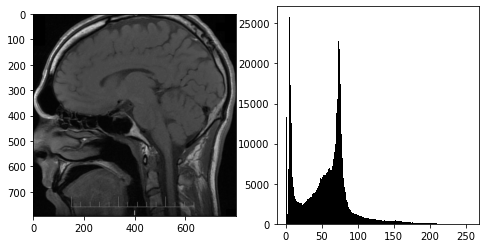

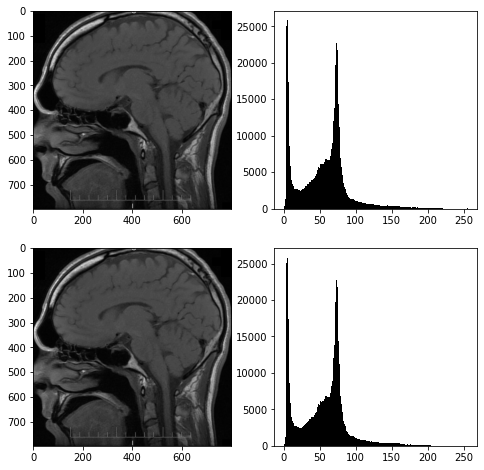

True


In [6]:
from skimage.color import rgb2gray
from skimage.io import imsave
from skimage import img_as_ubyte 

# Option 1 - take a single channel
mri_gray = mri[:,:,0] # or [:,:,1] or [:,:,2], it's the same!

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(mri_gray, cmap="gray")
ax[1].hist(mri_gray.ravel(), bins=256, range=(0, 256), color='black')
plt.show()

for a in ax:
    a.axis('off')

imsave("MRI_grayscale.png", mri_gray)

# Option 2 - use rgb2gray
mri_gray2 = img_as_ubyte(rgb2gray(mri))

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
ax[0, 0].imshow(mri_gray, cmap="gray")
ax[0, 1].hist(mri_gray.ravel(), bins=256, range=(0, 256), color='black')
ax[1, 0].imshow(mri_gray2, cmap="gray")
ax[1, 1].hist(mri_gray2.ravel(), bins=256, range=(0, 256), color='black')
plt.show()

for a in ax.ravel():
    a.axis('off')

# Check all is the same
print((mri_gray == mri_gray2).all())

### Exercise 1

Create a function that, given an image plots its histogram.
The function should have the following form:

`plot_histogram(img, num_bins, show_img)`

Where:

- `img` is the image
- `num_bins` is the number of bins in the histogram
- `show_img` is a boolean that, if set to `True`, will display the image next to the histogram.


## Histogram manipulation

The MRI image is not 